# Health Insurance Prediction with Linear Regression

In this notebook we use a Linear Regression model for predicting estimated Insurance charges for individuals with various health attributes. We also use various metrics such as RMSE and MAE for measuring the quality of our models. 

### Loading Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Downloading the dataset:

In [2]:
file_id = '117LO2wPC6D-Dr2LfkIVZfZDWrVMoEIGR'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Getting some sense of the dataset:

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### First we preprocess the data, then split them, since we don't want to repeat the preprocessing steps:

### quantizing the gender field:
from categorical to numeric (Male: 1, Female: 0, Other: 2)

In [4]:
# df['sex'].isna().sum()        ## equals 0 so there is no NaN
# df['sex'].drop_duplicates()   ## only two fields: male and female
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


### quantizing the smoker and other fields:
from categorical to numeric (yes: 1, no: 0)

In [5]:
# df['smoker'].isna().sum()          ## equals 0 so there is no NaN
# df['smoker'].drop_duplicates()     ## only two fields: male and female
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


### quantizing the region field:
from categorical to numeric, since there are four different inputs, we separate them into 4 fields:

In [6]:
df = pd.get_dummies(df, columns=['region'], dtype=int)
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


We separate the labels from the features so they aren't normalized:

In [7]:
features = df.drop('charges', axis=1)
labels = df['charges']
print(f"features: \n{features.columns} \n\nlabels: \n{labels}")

features: 
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object') 

labels: 
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Now that all the features are numerical, we can get some insight of the dataset so we can start normalizing:

In [8]:
features.describe()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see, some fields like age and bmi must be normalized in order to perform feature scaling. We can use the Min-Max scaling by using the values from the table above. But we also apply the feature engineering by magnifying some important features like bmi:

In [9]:
features['age'] = (features['age'] - 18) / (64 - 18)
features['bmi'] = (features['bmi'] - 15.96) / (53.13 - 15.96)
features['children'] = features['children'] / 5
features['smoker'] = features['smoker']

features.describe()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395572,0.218984,0.204783,0.242152,0.242900,0.272048,0.242900
std,0.305434,0.500160,0.164062,0.241099,0.403694,0.428546,0.428995,0.445181,0.428995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.388485,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,1.000000,0.504002,0.400000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing data into train and test sets:

We separate data by 80%-20% for train and testing, meaning the size of the test set is 1/4 of the training set. We also define a random seed so we can have the same choice of samples for each class, no matter how many times we run this. We test this percentage to see how our loss function behaves and then test other divisions.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=200)

### Defining the model and train:

The model is implemented by Scikit-Learn. We fit the data and then, we will measure the model's performance with various metrics:

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Testing the results:

In [12]:
y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print(f"MSE : {MSE} \n\nMAE : {MAE}\n\nRMSE : {RMSE} for 80%-20%")

MSE : 36758177.82282193 

MAE : 4278.273469226018

RMSE : 6062.852284430318 for 80%-20%


MSE or Mean Squared Error is the same function that we used as Loss function. It states in average, how far predictions are from real labels, in a squared way like (y_pred - y_test)^2. In this case, it may look so huge but in fact, it's a fair result for a linear regression problem. Considering how large and variant the labels can be, model struggles to keep up with that. We use this metric as our improvement score.

MAE or Mean Absolute Error is another variant of MSE, which only doesn't calculate the squared distance, meaning it takes the average of |y_pred - y_test|. This metric gives a better sense of how close the predictions are to the actual labels. Here, model manages to keep a 4200 range of miscalculation, which is a small range knowing the labels vary from (1121, 63770).

RMSE of Root Mean Squared Error takes the root of MSE to give a better sense of the distance and work with smaller values.

Now we test the model for different splitting of data like 85%-15%:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=200)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print(f"MSE : {MSE} \n\nMAE : {MAE}\n\nRMSE : {RMSE} for 85%-15%")

MSE : 38329941.06739634 

MAE : 4343.592617960199

RMSE : 6191.117917419789 for 85%-15%


And testing for 70%-30%:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=200)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print(f"MSE : {MSE} \n\nMAE : {MAE}\n\nRMSE : {RMSE} for 70%-30%")

MSE : 36470919.12505885 

MAE : 4223.995643315273

RMSE : 6039.1157568851795 for 70%-30%


And 75%-25%:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=200)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print(f"MSE : {MSE} \n\nMAE : {MAE}\n\nRMSE : {RMSE} for 75%-25%")

MSE : 35352558.21161146 

MAE : 4218.909924537314

RMSE : 5945.801729927719 for 75%-25%


As we can see, the best split belongs to 75%-25% because the values of the loss error is the minimum amongst the other split errors. So we use this as our optimum splitting.

### Partial fitting for training visualization:

In [16]:
model2 = SGDRegressor()

For plotting the line, we use "age" as x and "charges" as y. We also add the bias and recreate a 2D vision of the model, even though it has more than 2 dimensions and cannot be plotted.

In [17]:
def line_equation(w, b, x):
    return w * x + b

Epoch 0  |  MAE : 338647869.7320708  |  Coefficients: [ 98.65668696 113.45519     22.40411877   0.           0.
   0.           0.           0.         113.45519   ]  |  Bias : 113.45519



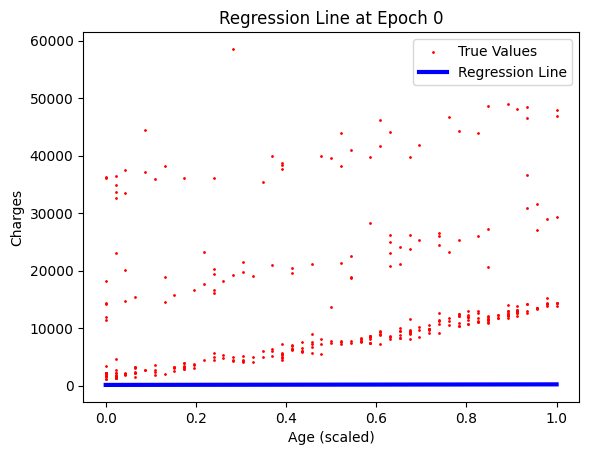

Epoch 500  |  MAE : 98289602.95455699  |  Coefficients: [3967.55483312 2103.84314601 2692.5069035  1495.49755294 5811.52039662
 1872.74383523 1425.69656875 1412.27201002 1168.61229651]  |  Bias : 5879.915941059505

Epoch 1000  |  MAE : 82742480.71946883  |  Coefficients: [4573.13549147 2108.8012062  2894.34164776 1547.88965184 8207.365091
 1687.61104417 1310.42877758 1770.46413064  921.15761101]  |  Bias : 5690.804617972973

Epoch 1500  |  MAE : 72417726.992895  |  Coefficients: [ 5077.06681038  1446.19339347  3021.42909039  1579.45401045
 10187.04774657  1814.75421978  1255.59195756  1566.964992
   853.15081404]  |  Bias : 5492.075947107699

Epoch 2000  |  MAE : 65688468.26147116  |  Coefficients: [ 5391.47358972  1408.43880265  3086.38162085  1572.51629811
 11636.29344809  1611.57361652  1136.14548396  1734.02673833
   641.7303051 ]  |  Bias : 5125.496211213186

Epoch 2500  |  MAE : 60222887.043666475  |  Coefficients: [ 5773.78787983   934.6800535   3186.69521045  1594.64237356
 129

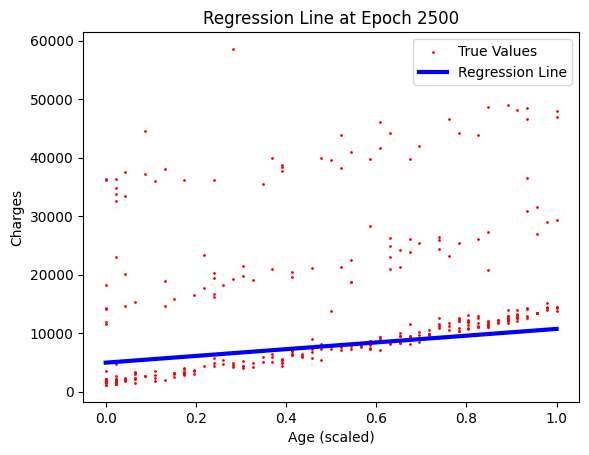

Epoch 3000  |  MAE : 56389651.85006749  |  Coefficients: [ 6009.17148753   947.32857685  3229.81331448  1585.50620809
 13999.87663071  1511.02399011   989.83633492  1622.47996939
   455.75855934]  |  Bias : 4581.809638566874

Epoch 3500  |  MAE : 53060581.228982225  |  Coefficients: [ 6342.30454197   595.87804573  3339.41080325  1613.51610822
 14975.1055764   1563.76333791   992.41652532  1444.26671061
   475.04054269]  |  Bias : 4478.497559495542

Epoch 4000  |  MAE : 50739433.56213581  |  Coefficients: [ 6522.92278513   621.15155474  3371.18094205  1599.55509275
 15737.07901434  1400.45203418   899.05708601  1517.08400162
   331.50172131]  |  Bias : 4151.379818156326

Epoch 4500  |  MAE : 48502065.58588981  |  Coefficients: [ 6827.13467573   356.08009553  3494.22263369  1640.00891525
 16503.3596845   1454.91275717   909.22033066  1358.26012126
   365.2616577 ]  |  Bias : 4091.1945467997293

Epoch 5000  |  MAE : 47124854.095231995  |  Coefficients: [ 6953.98953973   392.12353271  3505

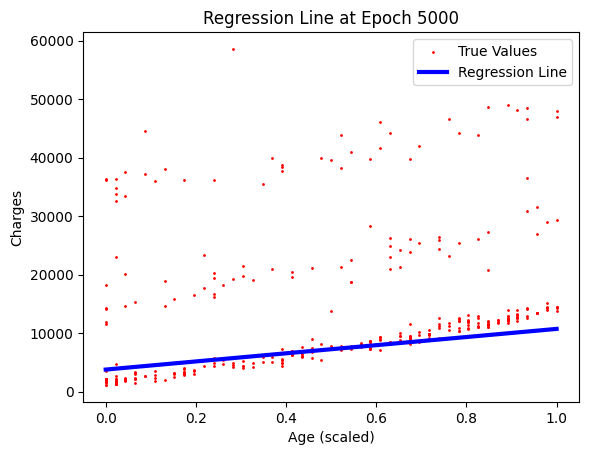

Epoch 5500  |  MAE : 45466667.86360788  |  Coefficients: [ 7249.26854469   185.4263396   3642.31476178  1667.43303482
 17700.47433287  1361.75123496   841.48416945  1262.34697649
   277.29211814]  |  Bias : 3746.871059268135

Epoch 6000  |  MAE : 44531251.757077016  |  Coefficients: [ 7357.53859279   240.81286626  3660.89686865  1649.13324611
 18143.18216233  1230.75133015   774.77972091  1292.73662113
   156.95221819]  |  Bias : 3459.4228155422843

Epoch 6500  |  MAE : 43365695.256181724  |  Coefficients: [ 7623.37665438    64.39049805  3788.15414921  1695.41003992
 18657.28979458  1278.09787758   788.32542038  1173.42795085
   206.54642239]  |  Bias : 3450.794212956879

Epoch 7000  |  MAE : 42727996.8734696  |  Coefficients: [ 7711.59688041   121.63160436  3805.49784174  1677.56153854
 19008.37932013  1155.89361562   721.16929895  1200.37798401
    96.77538105]  |  Bias : 3178.795018301345

Epoch 7500  |  MAE : 41845754.74072433  |  Coefficients: [ 7.96605159e+03 -1.23288353e+01  3.9

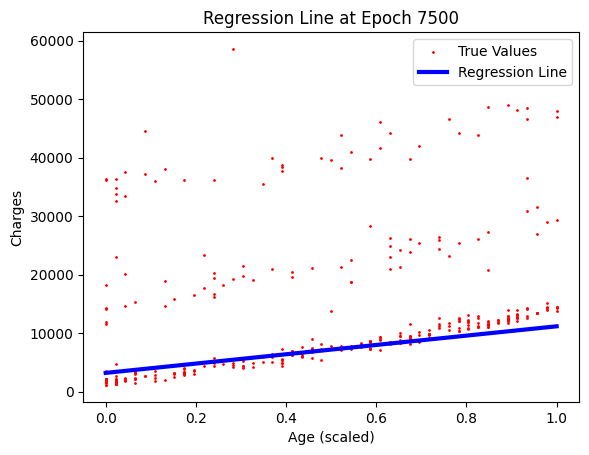

Epoch 8000  |  MAE : 41399104.1415909  |  Coefficients: [ 8036.13173526    48.38063289  3949.53067569  1712.60082916
 19726.95601786  1087.25835647   687.65469338  1114.12133501
    43.86806656]  |  Bias : 2937.8147303933583

Epoch 8500  |  MAE : 40771364.4218996  |  Coefficients: [ 8261.86109568   -89.97990464  4065.80229699  1749.39646944
 20070.38798421  1128.09790694   698.43520419  1004.79111037
    98.14215692]  |  Bias : 2934.5314814431426

Epoch 9000  |  MAE : 40402887.86723254  |  Coefficients: [ 8.32901386e+03 -7.32957044e+00  4.09282131e+03  1.74556663e+03
  2.03301419e+04  1.02435794e+03  6.57928560e+02  1.03017778e+03
  1.04320586e+01]  |  Bias : 2728.106511021393

Epoch 9500  |  MAE : 39950844.92158779  |  Coefficients: [ 8534.80112195  -137.57059807  4203.96906177  1780.14555893
 20599.13928026  1065.94840413   660.50185444   927.98256402
    56.27719494]  |  Bias : 2716.0571309264506

Epoch 10000  |  MAE : 39675827.85038218  |  Coefficients: [ 8589.22987266   -54.374444

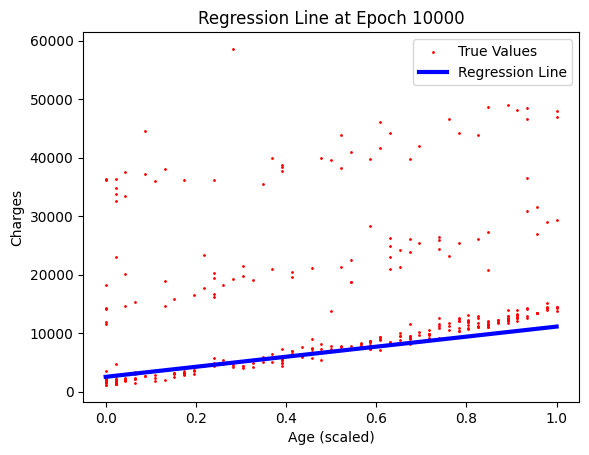

Epoch 10500  |  MAE : 39349163.86108482  |  Coefficients: [ 8.76950330e+03 -1.74641637e+02  4.32758129e+03  1.80291828e+03
  2.10159739e+04  1.00613320e+03  6.11896217e+02  8.46384952e+02
  1.91597863e+01]  |  Bias : 2489.174875611376

Epoch 11000  |  MAE : 39125289.790629156  |  Coefficients: [ 8823.92892785  -101.19588098  4361.30164824  1795.22176738
 21229.96625253   920.17293849   594.31225245   865.93053396
   -66.49205567]  |  Bias : 2319.6420175001645

Epoch 11500  |  MAE : 38859504.93014566  |  Coefficients: [ 8.98851756e+03 -2.18201525e+02  4.46035222e+03  1.82356337e+03
  2.13884340e+04  9.32518082e+02  5.81596686e+02  7.84863593e+02
 -1.43575180e+01]  |  Bias : 2290.4503756757795

Epoch 12000  |  MAE : 38698557.917005055  |  Coefficients: [ 9036.86148438  -125.38023826  4490.10808063  1819.95653988
 21566.07153971   873.39089559   566.47082272   791.43507758
   -99.31873244]  |  Bias : 2137.913979996294

Epoch 12500  |  MAE : 38497433.859352715  |  Coefficients: [ 9175.8249

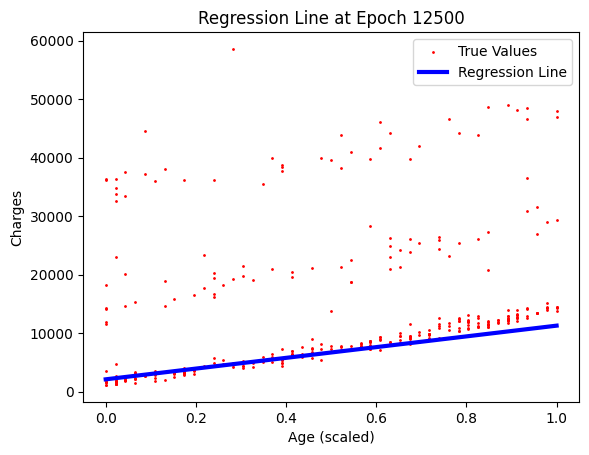

Epoch 13000  |  MAE : 38343775.40910265  |  Coefficients: [ 9237.36405361  -138.75481712  4622.96388012  1849.55153626
 21858.21223707   829.62350602   542.87400532   730.31364126
  -126.35524801]  |  Bias : 1982.588802545345

Epoch 13500  |  MAE : 38173483.172020815  |  Coefficients: [ 9369.30484506  -262.19218936  4705.70837945  1871.07882611
 21959.84064551   837.45534286   514.63444082   658.87319762
   -73.62911319]  |  Bias : 1943.557904657516

Epoch 14000  |  MAE : 38056748.20274274  |  Coefficients: [ 9423.47061676  -150.29269793  4752.60254961  1878.55420971
 22107.08626242   788.24833233   520.50939027   678.7055533
  -154.91443222]  |  Bias : 1838.8603654597132

Epoch 14500  |  MAE : 37913387.48681419  |  Coefficients: [ 9545.73419074  -268.40715513  4833.01785835  1897.62297802
 22189.06176685   799.63722654   491.04130753   607.48685326
  -102.45563359]  |  Bias : 1802.1039589124646

Epoch 15000  |  MAE : 37832813.274857625  |  Coefficients: [ 9588.38936863  -164.44899399 

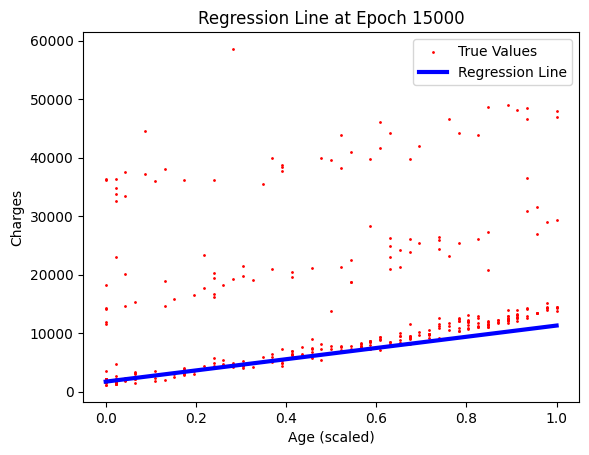

Epoch 15500  |  MAE : 37722460.517706856  |  Coefficients: [ 9695.74755497  -272.60454882  4943.96493803  1918.44109829
 22371.46843829   760.91889088   469.04860999   544.16509723
  -140.63269166]  |  Bias : 1640.048651415041

Epoch 16000  |  MAE : 37635648.24648086  |  Coefficients: [ 9744.75581239  -170.91185906  5000.14213807  1933.6770677
 22496.56065804   714.79181241   481.34708542   578.17673269
  -211.1560007 ]  |  Bias : 1569.7805944829831

Epoch 16500  |  MAE : 37538860.39848777  |  Coefficients: [ 9846.40880307  -275.98420376  5067.38056643  1944.9054624
 22541.19106575   725.19418111   450.24009692   501.47449468
  -166.07729926]  |  Bias : 1517.5206128564078

Epoch 17000  |  MAE : 37461972.87140107  |  Coefficients: [ 9894.08463894  -166.71835557  5123.12452943  1960.83998079
 22662.14949461   682.08146834   461.36101694   534.97237724
  -227.15547595]  |  Bias : 1458.014159733247

Epoch 17500  |  MAE : 37381753.914774105  |  Coefficients: [ 9984.55622756  -274.63994641  

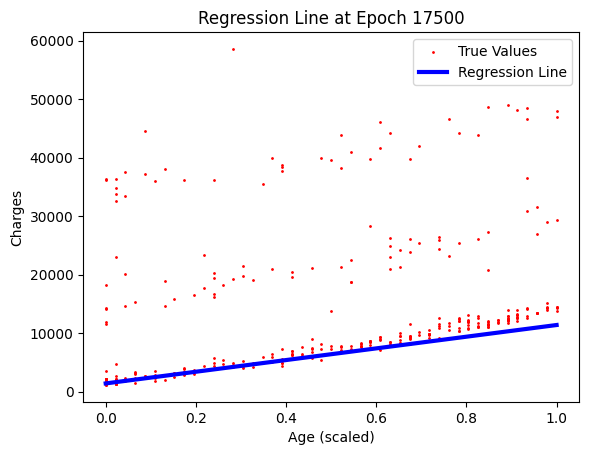

Epoch 18000  |  MAE : 37322460.673399605  |  Coefficients: [10031.81248594  -168.73362246  5242.1412108   1987.47811978
 22807.96966619   651.71452129   452.88283217   491.74133292
  -250.19669715]  |  Bias : 1353.0182892010369

Epoch 18500  |  MAE : 37263162.674436815  |  Coefficients: [10107.79653096  -286.69133636  5295.26049624  1987.98042781
 22802.80921413   662.21688657   405.51592802   414.85492639
  -220.15233205]  |  Bias : 1269.367890191199

Epoch 19000  |  MAE : 37201548.787222646  |  Coefficients: [10156.11863554  -166.60868393  5358.36581795  2012.55682603
 22926.62960891   625.12042833   435.63661427   453.21828022
  -271.46570563]  |  Bias : 1249.4962146556607

Epoch 19500  |  MAE : 37148777.1163509  |  Coefficients: [10222.71096455  -281.52969394  5405.95944193  2008.58526983
 22908.22491597   633.75163502   382.69651111   371.66515907
  -238.31715824]  |  Bias : 1156.8336820465208

Epoch 20000  |  MAE : 37095548.14541788  |  Coefficients: [10270.88287487  -165.0492324

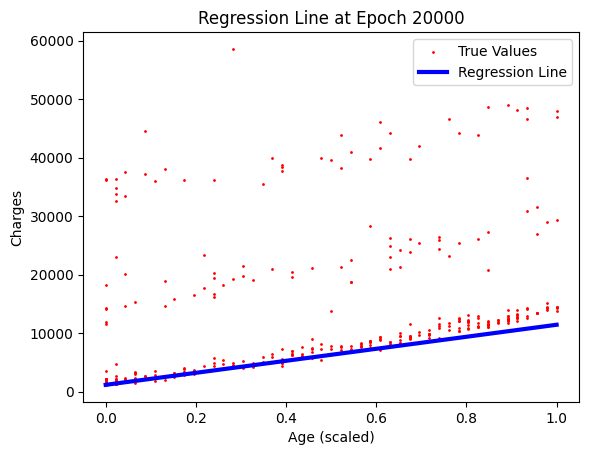

Epoch 20500  |  MAE : 37044319.06855104  |  Coefficients: [10332.26124743  -276.89793015  5520.64119482  2033.13831425
 23005.1775103    605.80890838   369.56859599   336.43470694
  -256.91282776]  |  Bias : 1062.032085785548

Epoch 21000  |  MAE : 37005792.69570298  |  Coefficients: [10372.25406272  -169.8492654   5576.48992842  2055.00029606
 23111.37792208   574.16943757   402.78916492   372.60459371
  -309.01873342]  |  Bias : 1047.7215513878089

Epoch 21500  |  MAE : 36949697.86992191  |  Coefficients: [10437.16386348  -270.37145468  5632.22370874  2056.28513535
 23090.02315804   584.40589968   354.21778504   303.16899375
  -274.98760724]  |  Bias : 974.0238217111173

Epoch 22000  |  MAE : 36920277.177405335  |  Coefficients: [10473.18036881  -165.84242261  5687.48469493  2077.32172844
 23190.53585701   551.18810103   387.62055666   338.85771319
  -323.03783712]  |  Bias : 961.8873578976321

Epoch 22500  |  MAE : 36862262.89894231  |  Coefficients: [10535.29352102  -258.23962212  

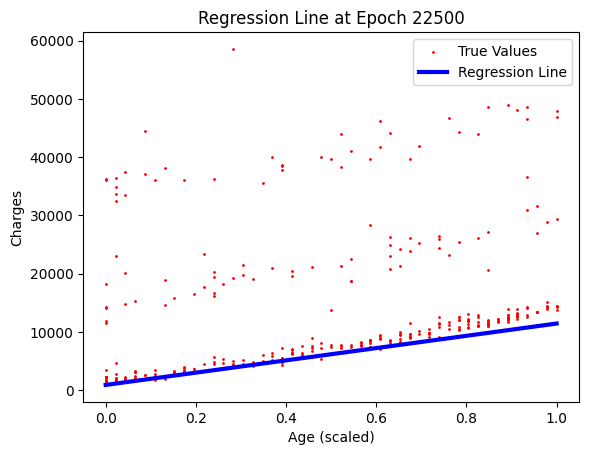

Epoch 23000  |  MAE : 36849879.30433806  |  Coefficients: [10558.68773231  -169.1919548   5789.42308346  2099.63245299
 23251.17548725   529.67842423   374.54430946   300.86662263
  -341.10436302]  |  Bias : 871.3174348880528

Epoch 23500  |  MAE : 36787013.00989497  |  Coefficients: [10626.23436018  -251.0451874   5852.13223908  2104.53946053
 23246.23941177   539.77868945   334.64426149   245.50138564
  -302.0321498 ]  |  Bias : 825.2583368663071

Epoch 24000  |  MAE : 36781582.10533771  |  Coefficients: [10646.23550562  -165.95089513  5895.19445355  2120.23516977
 23312.49461258   512.05287792   360.79081079   272.50933401
  -358.43409854]  |  Bias : 794.3174446969073



In [18]:
results = []
epoch = 0

for e in range(0, 24):

    for i in X_train.index:

        model2.partial_fit(np.expand_dims(X_train.loc[i].values, 0), [y_train[i]])

        if epoch % 500 == 0:
            mse = np.mean((model2.predict(X_test) - y_test) ** 2)
            b = model2.intercept_[0]
            w = model2.coef_.flatten()

            print(f"Epoch {epoch}  |  MAE : {mse}  |  Coefficients: {w}  |  Bias : {b}\n")

            results.append({
                'b': b,
                'w': w,
                'mse_test': mse
            })


            if epoch % 2500 == 0:

                bias = b
                age_w = w[0]
                min_age = X_test["age"].values.min()
                max_age = X_test["age"].values.max()
                start_point = line_equation(age_w, bias, min_age)
                end_point = line_equation(age_w, bias, max_age)

                x = [min_age, max_age]
                y = [start_point, end_point]

                plt.scatter(X_test["age"].values, y_test, c='r', s=1, label="True Values")
                plt.plot(x, y, label="Regression Line", color='blue', linewidth=3)
                plt.title(f"Regression Line at Epoch {epoch}")
                plt.xlabel("Age (scaled)")
                plt.ylabel("Charges")
                plt.legend()
                plt.show()

        epoch += 1

First we plot the diagram of how MAE has changed through training:

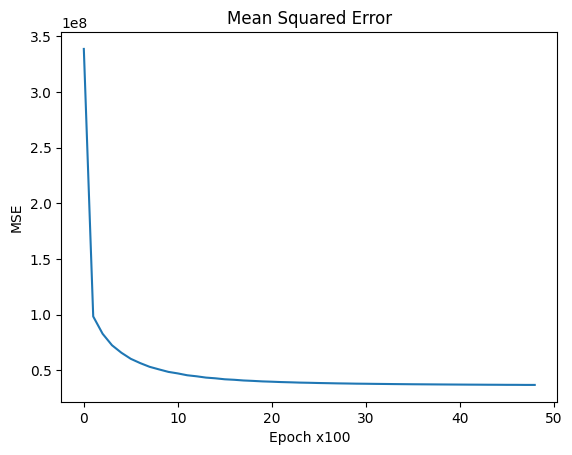

In [19]:
MSE_results = [i['mse_test'] for i in results]
x = np.arange(0, len(MSE_results))

plt.plot(x, MSE_results)
plt.title("Mean Squared Error")
plt.xlabel("Epoch x100")
plt.ylabel("MSE")

plt.show()

We can have an interpretation of the above diagram. The first thing we notice is how the metric (MSE loss) has decreased and it has a huge fall. This fall could be explained by the Stochastic Gradient Descent that takes long steps and large updates at first, since the gradient is also large.

As it continues, the gradients start to decrease and fade to zero. So does the updates in the model; We can see in the changes of the line, that the first line is quite random and as epochs continue, it aligns more with the majority of the data.

The pattern of changes in optimization and line change, is the same and quite similar to Logarithmic function. Meaning it starts with huge changes and slowly fades to nothing. So does the diagram show.

### Visualizing weights convergence:

First we demonstrate the changes in weights:

In [20]:
weights = [i['w'] for i in results]
for i in range(len(weights)):
    if i % 10 == 0:
        print(weights[i])

[ 98.65668696 113.45519     22.40411877   0.           0.
   0.           0.           0.         113.45519   ]
[ 6953.98953973   392.12353271  3505.06107671  1618.49810827
 17063.76896016  1312.22679827   827.8265197   1382.22769736
   233.6467785 ]
[ 8589.22987266   -54.3744443   4229.71053445  1770.80693075
 20821.69070378   971.2332637    624.62655015   947.60473829
   -30.07925486]
[ 9588.38936863  -164.44899399  4876.82880153  1906.57140209
 22313.34911994   750.03576383   502.61658721   625.80100933
  -188.3320044 ]
[10270.88287487  -165.04923243  5471.16384183  2035.93942923
 23029.93786329   598.7617348    418.77209005   415.03412347
  -289.7374438 ]


In order to show that these numbers are getting close to a specific number, we can plot two random weights taken from them:

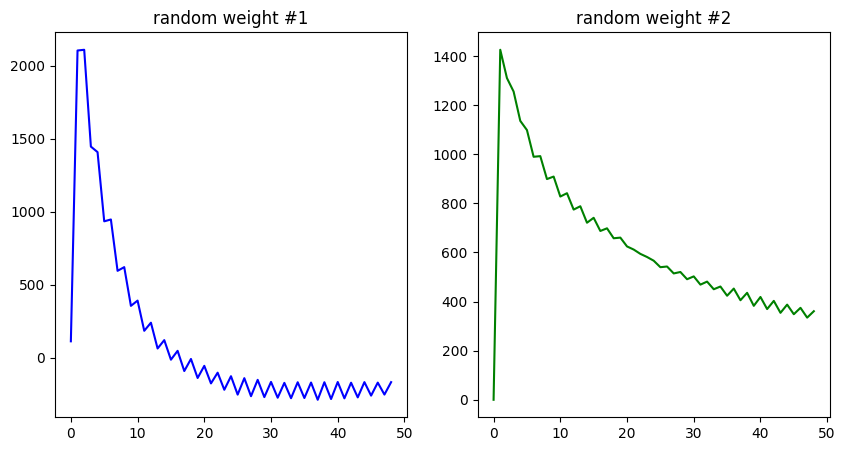

In [21]:
weight_1 = []
weight_2 = []

for i in range(len(weights)):
    weight_1.append(weights[i][1])
    weight_2.append(weights[i][6])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("random weight #1")
plt.plot(np.arange(0, len(weight_1)), weight_1, c='blue')

plt.subplot(1,2,2)
plt.title("random weight #2")
plt.plot(np.arange(0, len(weight_2)), weight_2, c='green')

plt.show()

The diagrams are distorted because we only recorded only 50 samples through training. But in general, we can see that they start with large changes and then oscillate around a number. The reason of this, is converging; It means our optimizer (SGD) has found a minima and as the gradients become smaller, the changes in the model also decreases.

The oscillation can be explained by using Stochastic Gradient Descent, meaning it takes one sample at a time and updates the weights of the model according to that. This could highlight the performance of the model and make it often fail to converge.